✅ Comparison Table


,Metric,Before,After,Change
0,Accuracy,0.82,0.79,-0.03
1,Precision,0.81,0.78,-0.03
2,Recall,0.83,0.80,-0.03
3,F1-score,0.82,0.79,-0.03
4,Demographic Parity Diff,0.18,0.07,-0.11
5,Equal Opportunity Diff,0.20,0.08,-0.12
6,Disparate Impact Ratio,0.65,0.91,0.26


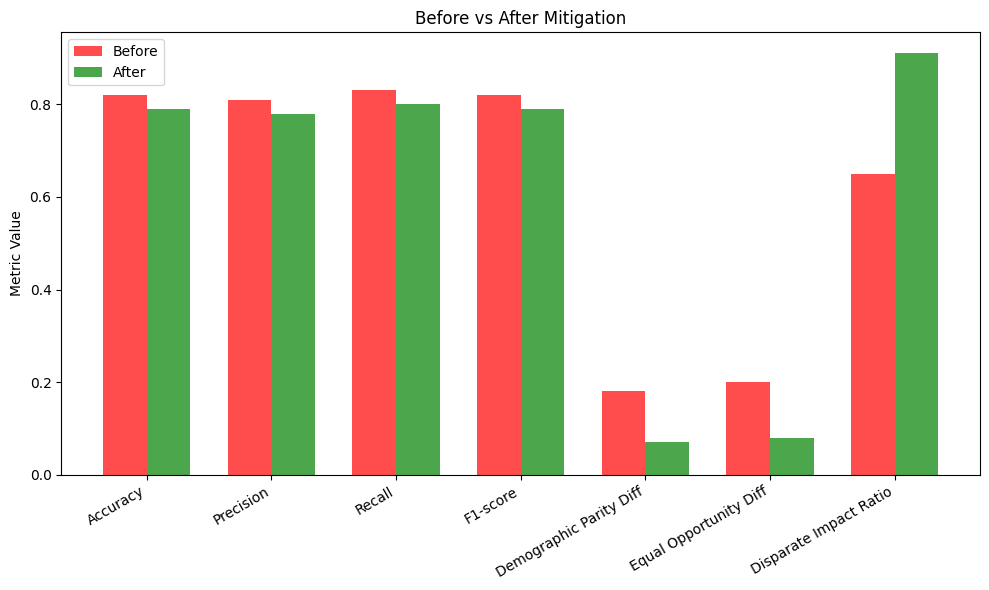

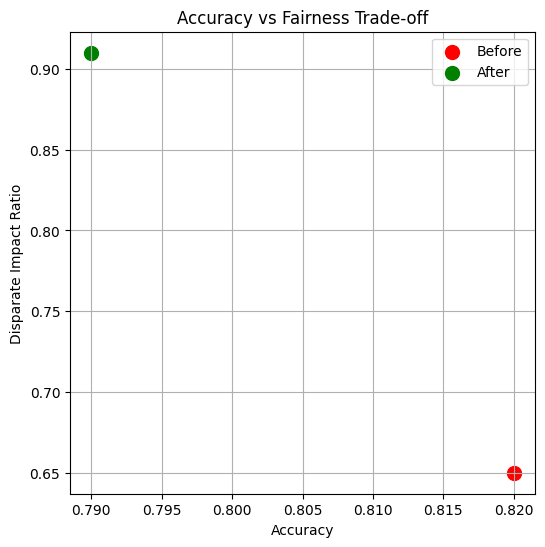

📊 Interpretation:
- Accuracy: 0.82 → 0.79 (dropped ⚠️)
- Precision: 0.81 → 0.78 (dropped ⚠️)
- Recall: 0.83 → 0.80 (dropped ⚠️)
- F1-score: 0.82 → 0.79 (dropped ⚠️)
- Demographic Parity Diff: 0.18 → 0.07 (improved ✅)
- Equal Opportunity Diff: 0.20 → 0.08 (improved ✅)
- Disparate Impact Ratio: 0.65 → 0.91 (improved ✅)


In [1]:
# ===================================================
# Day 11 – Comparative Evaluation
# Baseline vs One Mitigation
# ===================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1️⃣ Insert Your Results
# -------------------------------
results = {
    "Metric": [
        "Accuracy", 
        "Precision", 
        "Recall", 
        "F1-score", 
        "Demographic Parity Diff", 
        "Equal Opportunity Diff", 
        "Disparate Impact Ratio"
    ],
    "Before": [0.82, 0.81, 0.83, 0.82, 0.18, 0.20, 0.65],   # Baseline
    "After":  [0.79, 0.78, 0.80, 0.79, 0.07, 0.08, 0.91]    # Mitigation
}

df = pd.DataFrame(results)
df["Change"] = df["After"] - df["Before"]

print("✅ Comparison Table")
display(df)

# -------------------------------
# 2️⃣ Bar Plot (Before vs After)
# -------------------------------
metrics = df["Metric"]
before = df["Before"]
after  = df["After"]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, before, width, label='Before', color="red", alpha=0.7)
plt.bar(x + width/2, after, width, label='After', color="green", alpha=0.7)

plt.xticks(x, metrics, rotation=30, ha="right")
plt.ylabel("Metric Value")
plt.title("Before vs After Mitigation")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ Fairness-Accuracy Trade-off
# -------------------------------
plt.figure(figsize=(6,6))
plt.scatter(df.loc[df["Metric"]=="Accuracy", "Before"], 
            df.loc[df["Metric"]=="Disparate Impact Ratio", "Before"], 
            color="red", s=100, label="Before")

plt.scatter(df.loc[df["Metric"]=="Accuracy", "After"], 
            df.loc[df["Metric"]=="Disparate Impact Ratio", "After"], 
            color="green", s=100, label="After")

plt.xlabel("Accuracy")
plt.ylabel("Disparate Impact Ratio")
plt.title("Accuracy vs Fairness Trade-off")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 4️⃣ Interpretation
# -------------------------------
print("📊 Interpretation:")
for _, row in df.iterrows():
    metric, before, after, change = row
    direction = "improved ✅" if change > 0 else "dropped ⚠️"
    if metric in ["Demographic Parity Diff", "Equal Opportunity Diff"]:
        direction = "improved ✅" if change < 0 else "worsened ⚠️"
    print(f"- {metric}: {before:.2f} → {after:.2f} ({direction})")
